In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

from pylab import rcParams
import seaborn  as sb

import scipy

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale



In [2]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

In [102]:
path=r'/Users/Sasha/Documents/Artificial_Intelligence/Year2/python/FINAL_PROJECT/jester-data-1.xls'

In [5]:
jokes=pd.read_excel(path)

In [6]:
jokes

,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,...,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
2,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
3,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24978,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24979,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24980,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [ ]:
jokes.to_csv (r'/Users/Sasha/Documents/Artificial_Intelligence/Year2/python/FINAL_PROJECT/jester-data-1.csv', index = None, header=True)

In [7]:
normal_jokes=pd.read_csv('/Users/Sasha/Documents/Artificial_Intelligence/Year2/python/FINAL_PROJECT/jester-data-1.csv')

In [8]:
normal_jokes

,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,...,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
2,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
3,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24978,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24979,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24980,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [9]:
normal_jokes.columns=list(range(101))

In [10]:
normal_jokes

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
2,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
3,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24978,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24979,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24980,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [13]:
normal_jokes_new.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
2,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
3,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


In [12]:
normal_jokes_new=normal_jokes.iloc[:,1:]

In [14]:
for i in range(100):
    for j in list(normal_jokes_new.index):
        if normal_jokes_new.iloc[j,i]==99:
            normal_jokes_new.iloc[j,i]=np.nan

In [15]:
normal_jokes_new.columns

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
             27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
             40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
             53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
             66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
             79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64')

In [27]:
nine=normal_jokes_new.columns[8]

In [29]:
normal_jokes_new[[normal_jokes_new.columns[8]]].describe()

,9
count,15751.000000
mean,-0.556496
std,5.161952
min,-9.950000
25%,-4.760000
50%,-0.190000
75%,3.300000
max,9.900000


In [31]:
normal_jokes_new.describe()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
count,16451.000000,18183.000000,16641.000000,15607.000000,24976.000000,20430.000000,24975.000000,24980.000000,15751.000000,20323.000000,...,9671.000000,9889.000000,9988.000000,10200.000000,10265.000000,10370.000000,10519.000000,10666.000000,10910.000000,9943.000000
mean,0.905104,0.207988,0.317174,-1.448684,0.403874,1.594941,-0.429285,-0.624277,-0.556496,1.301529,...,2.038446,1.179744,2.504041,1.173482,1.039130,1.528003,1.674444,0.767692,-0.031244,1.354711
std,5.171508,5.597119,5.399415,5.234546,5.255566,4.900151,5.495717,4.929149,5.161952,5.087307,...,5.060701,5.127291,4.611339,5.140307,5.167043,4.852069,5.024810,5.393833,5.176806,5.300409
min,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,-2.670000,-4.420000,-4.030000,-5.870000,-3.690000,-1.310000,-5.290000,-4.610000,-4.760000,-2.090000,...,-0.945000,-2.380000,-0.100000,-2.280000,-2.570000,-1.347500,-1.170000,-3.400000,-4.170000,-2.330000
50%,1.600000,0.830000,0.780000,-1.460000,1.120000,2.230000,-0.050000,-0.290000,-0.190000,1.940000,...,2.860000,1.800000,3.160000,1.750000,1.650000,2.140000,2.480000,1.460000,0.290000,2.140000
75%,4.900000,4.810000,4.660000,2.520000,4.470000,5.440000,3.880000,3.060000,3.300000,5.390000,...,6.120000,5.290000,6.070000,5.290000,5.100000,5.277500,5.630000,5.150000,3.980000,5.730000
max,9.370000,9.370000,9.370000,9.370000,9.370000,9.470000,9.610000,9.760000,9.900000,9.370000,...,9.560000,9.420000,9.370000,9.420000,9.370000,9.370000,9.370000,9.370000,9.370000,9.370000


In [33]:
import numpy as np

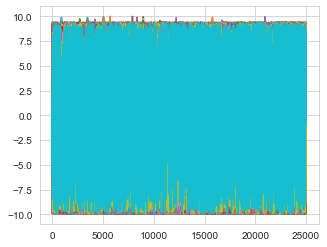

In [46]:
standardized_data=scale(normal_jokes_new,axis=0,with_mean=False,with_std=False)
plt.plot(standardized_data)

In [54]:
standardized_data

array([[ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,  8.35,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

In [67]:
scaling=preprocessing.MinMaxScaler(feature_range=(1,5))

scaled=scaling.fit_transform(standardized_data)

In [69]:
scaled

array([[3.9047619 , 3.        , 4.37681159, ..., 3.13043478, 2.16563147,
        3.2815735 ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 4.78881988,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [3.563147  , 3.61283644, 2.23602484, ...,        nan,        nan,
               nan]])

In [88]:
dataframe=pd.DataFrame(scaled)

In [89]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.904762,3.000000,4.376812,3.964803,2.567288,1.059732,2.885481,1.935566,4.794458,4.968944,...,3.618145,2.032525,3.000000,4.677852,3.020704,2.616977,3.693582,3.130435,2.165631,3.281573
1,NaN,NaN,NaN,NaN,4.929607,4.958805,4.881391,4.900558,NaN,NaN,...,NaN,NaN,NaN,4.929788,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4.788820,NaN,NaN,3.432712,4.730175,2.458078,4.279554,NaN,3.440994,...,NaN,NaN,NaN,3.164171,NaN,NaN,NaN,NaN,NaN,NaN
3,4.819876,4.014493,2.196687,1.944099,3.341615,3.378991,4.474438,3.954845,2.916373,4.246377,...,4.104049,4.207021,3.944099,4.126484,4.246377,3.380952,3.703934,4.416149,3.432712,3.391304
4,1.782609,2.327122,3.151139,1.300207,1.592133,2.159629,1.257669,2.842719,1.664987,2.687371,...,2.314198,1.631905,2.919255,2.443469,2.608696,2.366460,3.070393,1.180124,2.014493,2.345756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,3.151139,4.598344,4.939959,3.542443,3.722567,4.439753,1.237219,2.911720,1.243829,4.556936,...,4.850333,2.804853,4.968944,1.671141,4.809524,4.929607,4.416149,4.859213,4.879917,4.598344
24978,4.950311,1.370600,4.838509,4.939959,3.240166,1.210093,2.319018,4.192288,1.370781,4.074534,...,2.800103,1.871451,2.757764,3.104285,4.968944,1.362319,1.563147,1.281573,4.950311,4.809524
24979,NaN,NaN,NaN,NaN,1.451346,NaN,4.404908,1.649417,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24980,NaN,NaN,NaN,NaN,1.049689,NaN,3.967280,1.334855,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df1=dataframe.round(decimals=1)

In [91]:
df1

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.9,3.0,4.4,4.0,2.6,1.1,2.9,1.9,4.8,5.0,...,3.6,2.0,3.0,4.7,3.0,2.6,3.7,3.1,2.2,3.3
1,NaN,NaN,NaN,NaN,4.9,5.0,4.9,4.9,NaN,NaN,...,NaN,NaN,NaN,4.9,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4.8,NaN,NaN,3.4,4.7,2.5,4.3,NaN,3.4,...,NaN,NaN,NaN,3.2,NaN,NaN,NaN,NaN,NaN,NaN
3,4.8,4.0,2.2,1.9,3.3,3.4,4.5,4.0,2.9,4.2,...,4.1,4.2,3.9,4.1,4.2,3.4,3.7,4.4,3.4,3.4
4,1.8,2.3,3.2,1.3,1.6,2.2,1.3,2.8,1.7,2.7,...,2.3,1.6,2.9,2.4,2.6,2.4,3.1,1.2,2.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,3.2,4.6,4.9,3.5,3.7,4.4,1.2,2.9,1.2,4.6,...,4.9,2.8,5.0,1.7,4.8,4.9,4.4,4.9,4.9,4.6
24978,5.0,1.4,4.8,4.9,3.2,1.2,2.3,4.2,1.4,4.1,...,2.8,1.9,2.8,3.1,5.0,1.4,1.6,1.3,5.0,4.8
24979,NaN,NaN,NaN,NaN,1.5,NaN,4.4,1.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24980,NaN,NaN,NaN,NaN,1.0,NaN,4.0,1.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
tryy=df1.describe()

In [93]:
shutka=tryy.iloc[1]

In [94]:
shutka

0     3.248277
1     3.103503
2     3.126200
3     2.760428
4     3.144311
        ...   
95    3.376654
96    3.407719
97    3.219089
98    3.054161
99    3.340863
Name: mean, Length: 100, dtype: float64

In [95]:
dataframe_new=pd.DataFrame(shutka)

In [96]:
dataframe_new

,mean
0,3.248277
1,3.103503
2,3.126200
3,2.760428
4,3.144311
...,...
95,3.376654
96,3.407719
97,3.219089
98,3.054161


In [98]:
train1=dataframe_new.round(decimals=1)

In [99]:
train1

,mean
0,3.2
1,3.1
2,3.1
3,2.8
4,3.1
...,...
95,3.4
96,3.4
97,3.2
98,3.1


In [101]:
path1=r'/Users/Sasha/Documents/Artificial_Intelligence/Year2/python/FINAL_PROJECT/stupidstuff.json.txt'

In [103]:
stupid=pd.read_json(path1)

In [104]:
stupid

,body,category,id,rating
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63
1,"At a dinner party, several of the guests were ...",Blonde Jokes,2,2.57
2,One day this cop pulls over a blonde for speed...,Blonde Jokes,3,3.09
3,Three women are about to be executed for crime...,Blonde Jokes,4,4.10
4,A girl came skipping home FROM school one day....,Blonde Jokes,5,4.30
...,...,...,...,...
3768,,Miscellaneous,3769,5.00
3769,The Pope and the Queen of England are on the s...,Miscellaneous,3770,4.00
3770,,Miscellaneous,3771,1.00
3771,Letter to Xerox and the Reply\n\nDear Kings of...,Miscellaneous,3772,4.00


In [107]:
stupid.to_csv (r'/Users/Sasha/Documents/Artificial_Intelligence/Year2/python/FINAL_PROJECT/stupidstuff.csv', index = None, header=True)

In [108]:
stupid_jokes=pd.read_csv('/Users/Sasha/Documents/Artificial_Intelligence/Year2/python/FINAL_PROJECT/stupidstuff.csv')

In [109]:
stupid_jokes

,body,category,id,rating
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63
1,"At a dinner party, several of the guests were ...",Blonde Jokes,2,2.57
2,One day this cop pulls over a blonde for speed...,Blonde Jokes,3,3.09
3,Three women are about to be executed for crime...,Blonde Jokes,4,4.10
4,A girl came skipping home FROM school one day....,Blonde Jokes,5,4.30
...,...,...,...,...
3768,NaN,Miscellaneous,3769,5.00
3769,The Pope and the Queen of England are on the s...,Miscellaneous,3770,4.00
3770,NaN,Miscellaneous,3771,1.00
3771,Letter to Xerox and the Reply\n\nDear Kings of...,Miscellaneous,3772,4.00


In [110]:
standardized_data1=scale(stupid_jokes,axis=0,with_mean=False,with_std=False)
plt.plot(standardized_data1)

ValueError: could not convert string to float: 'A blackjack dealer and a player with a thirteen count in his hand\nwere arguing about whether or not it was appropriate to tip the\ndealer.\n\nThe player said, "When I get bad cards, it\'s not the dealer\'s fault.\nAccordingly, when I get good cards, the dealer obviously had nothing\nto do with it so, why should I tip him?"\n\nThe dealer said, "When you eat out do you tip the waiter?"\n\n"Yes."\n\n"Well then, he serves you food, I\'m serving you cards, so you should\ntip me."\n\n"Okay, but, the waiter gives me what I ask for. I\'ll take an eight."'